### Cho bộ dữ liệu us-state-college-pricing-2017.csv. Bộ dữ liệu này ghi lại các mức học phí của các trường đại học từ năm học 2004-05 đến 2017-18 theo từng quận (in-District) và tiểu bang (in-State)

* Đọc dữ liệu
* Xem xét vấn đề dữ liệu cần khắc phục
* Chuẩn lại dữ liệu để khắc phục vấn đề trên (tham khảo kết quả gợi ý như hình sau)
![kết quả chuẩn hóa](hinh1.png)


* Vẽ biểu đồ để theo dõi mức học phí trung bình theo từng năm học như sau
![In-District](hinh2.png)
![In-State](hinh3.png)

### Đặt yêu cầu ngược lại là cần phải tạo pivot table để xem thống kê theo State và Year 

* Hãy chuyển dữ liệu mới làm ở trên về dạng thống kê 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings('ignore')

### Đọc dữ liệu

In [5]:
df = pd.read_csv('us-state-college-pricing-2017.csv', skiprows = 2)

In [6]:
df.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368",...,"$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985",...,"$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355",...,"$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516",...,"$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


### Xem xét vấn đề dữ liệu cần khắc phục

In [7]:
"""
Nhận xét: từ data frame thô mà ta read_csv và quan sát cấu trúc dữ liệu trong file csv, 
ta thấy tên cột chứa giá trị thay vì chứa biến,
data chứa dữ liệu null

=> cách xử lý: dựa vào cấu trúc dữ liệu trong csv, ta tách 2 bảng theo 2 nhóm: df_2year_state và df_4year_district để dễ xử lý
"""    


'\nNhận xét: từ data frame thô mà ta read_csv và quan sát cấu trúc dữ liệu trong file csv, \nta thấy tên cột chứa giá trị thay vì chứa biến,\ndata chứa dữ liệu null\n\n=> cách xử lý: dựa vào cấu trúc dữ liệu trong csv, ta tách 2 bảng theo 2 nhóm: df_2year_state và df_4year_district để dễ xử lý\n'

In [8]:
col_len = len(df.columns)
col_len

29

In [9]:
### Chuẩn lại dữ liệu để khắc phục vấn đề trên

In [10]:
# ta tách df thành 2 df nhỏ theo 2 nhóm df_2year_state và df_4year_district để dễ xử lý,
# sau đó ta merge 2 df này thành df lớn sau khi đã melt rồi kiểm tra, xử lý NaN, outliers, ...

In [11]:
df_2year_district = df.iloc[:, :15].copy()
df_2year_district.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368","$4,350","$4,373","$4,425","$4,470","$4,487"
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985","$3,150","$3,264","$3,490","$3,593","$3,645"
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355","$2,445","$2,497","$2,538","$2,603","$2,606"
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516","$1,493","$1,467","$1,459","$1,450","$1,430"


In [12]:
df_new_2 = pd.melt(frame = df_2year_district, id_vars = 'State', var_name= 'College Year', value_name = 'In-District 2 Year Tuition Free')

In [13]:
#chuyển $number -> number  và chuyển chuổi số thành số
df_new_2['In-District 2 Year Tuition Free'] = df_new_2['In-District 2 Year Tuition Free'].apply(lambda x: int(x[1:].replace(',', '')) if x is not np.NaN else x)

df_new_2.head()

,State,College Year,In-District 2 Year Tuition Free
0,Alaska,2004-05,NaN
1,Alabama,2004-05,3526.0
2,Arkansas,2004-05,2422.0
3,Arizona,2004-05,1800.0
4,California,2004-05,1044.0


In [14]:
# các cột của df_4year_state
col_df_4year_state = [0]
col_df_4year_state.extend(range(15, col_len))


df_4year_state = df.iloc[:, col_df_4year_state].copy()
df_4year_state.head()

,State,2004-05.1,2005-06.1,2006-07.1,2007-08 .1,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
0,Alaska,"$4,439","$4,752","$5,045","$5,200","$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$5,829","$5,991","$5,901","$6,163","$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$5,921","$6,239","$6,392","$6,580","$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$5,271","$5,555","$5,622","$5,828","$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$5,422","$5,670","$5,472","$5,818","$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


In [15]:
#rename các column để đưa về dạng chuẩn theo file csv (2004-05.1 rename thành 2004-05)
for i in df_4year_state.iloc[:,1:].columns:
    if i[-2:] == '.1':
        df_4year_state.rename(columns={i:i[:-2]}, inplace=True)
df_4year_state.head()    

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
0,Alaska,"$4,439","$4,752","$5,045","$5,200","$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$5,829","$5,991","$5,901","$6,163","$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$5,921","$6,239","$6,392","$6,580","$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$5,271","$5,555","$5,622","$5,828","$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$5,422","$5,670","$5,472","$5,818","$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


In [16]:
df_new_4 = pd.melt(frame = df_4year_state, id_vars = 'State', var_name= 'College Year', value_name = 'In-State 4 Year Tuition Free')
df_new_4.head()

,State,College Year,In-State 4 Year Tuition Free
0,Alaska,2004-05,"$4,439"
1,Alabama,2004-05,"$5,829"
2,Arkansas,2004-05,"$5,921"
3,Arizona,2004-05,"$5,271"
4,California,2004-05,"$5,422"


In [17]:
#chuyển $number -> number  và chuyển chuổi số thành số
df_new_4['In-State 4 Year Tuition Free'] = df_new_4['In-State 4 Year Tuition Free'].apply(lambda x: int(x[1:].replace(',', '')) if x is not np.NaN else x)

df_new_4.head()

,State,College Year,In-State 4 Year Tuition Free
0,Alaska,2004-05,4439
1,Alabama,2004-05,5829
2,Arkansas,2004-05,5921
3,Arizona,2004-05,5271
4,California,2004-05,5422


In [18]:
df_new = pd.merge(df_new_2, df_new_4, on = ['State' ,'College Year'], how = 'outer')
df_new



,State,College Year,In-District 2 Year Tuition Free,In-State 4 Year Tuition Free
0,Alaska,2004-05,NaN,4439
1,Alabama,2004-05,3526.0,5829
2,Arkansas,2004-05,2422.0,5921
3,Arizona,2004-05,1800.0,5271
4,California,2004-05,1044.0,5422
...,...,...,...,...
723,Vermont,2017-18,7980.0,16043
724,Washington,2017-18,4376.0,9480
725,Wisconsin,2017-18,4394.0,8962
726,West Virginia,2017-18,4299.0,7887


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            728 non-null    object 
 1   College Year                     728 non-null    object 
 2   In-District 2 Year Tuition Free  686 non-null    float64
 3   In-State 4 Year Tuition Free     728 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.4+ KB


In [20]:
#từ kết quả trên, ta thấy data có dữ liệu null ở cột Public Two-Year In-District Tuition and Fees => ta sẽ tiến hành xử lý các giá trị này

In [21]:
df_new.duplicated(subset = df_new.columns, keep='first').any()

False

In [22]:
#=> ko có row nào bị trùng data

In [23]:
df_new.describe()

,In-District 2 Year Tuition Free,In-State 4 Year Tuition Free
count,686.000000,728.000000
mean,3608.448980,8191.675824
std,1209.222672,2656.293726
min,706.000000,1517.000000
25%,2769.500000,6306.500000
50%,3585.000000,7999.000000
75%,4304.250000,9844.250000
max,7980.000000,16073.000000


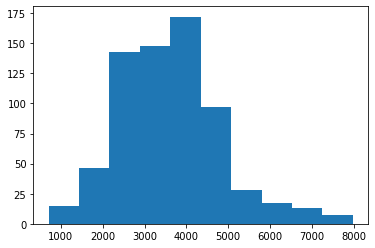

In [24]:
plt.hist(df_new['In-District 2 Year Tuition Free'])
plt.show()

In [25]:
## Xử lý data null

#df_new = df_new.interpolate()  # dùng pp nội suy
#df_new.info()

df_new = df_new.fillna(0)  # có vẻ trên vd minh họa của thầy là thầy dùng cách này ạ
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            728 non-null    object 
 1   College Year                     728 non-null    object 
 2   In-District 2 Year Tuition Free  728 non-null    float64
 3   In-State 4 Year Tuition Free     728 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.4+ KB


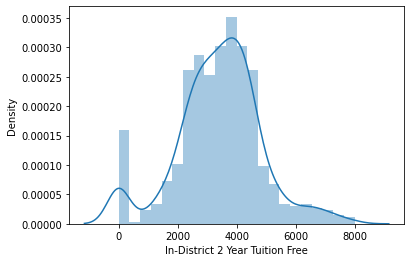

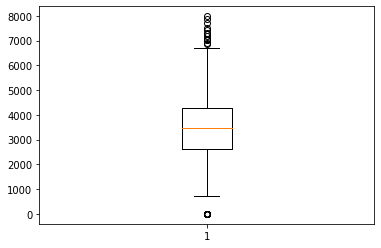

In [26]:
sns.distplot(df_new['In-District 2 Year Tuition Free'].dropna())
plt.show()

plt.boxplot(df_new['In-District 2 Year Tuition Free'])
plt.show()

In [27]:
# => dù In-District 2 Year Tuition Free tồn tại các giá trị outliers nhưng đây là các outliers hợp lệ

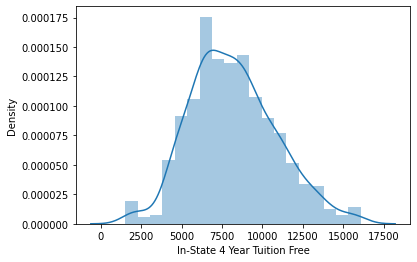

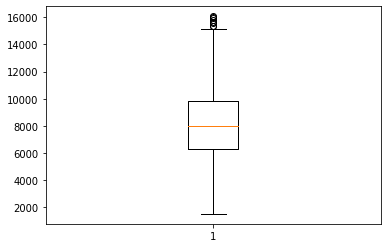

In [28]:
# Public Four-Year In-State Tuition and Fees ($) ko có dữ liệu null nên ko cẩn phải xử lý data null
sns.distplot(df_new['In-State 4 Year Tuition Free'])
plt.show()

plt.boxplot(df_new['In-State 4 Year Tuition Free'])
plt.show()

In [29]:
# => dù In-State 4 Year Tuition Free tồn tại các giá trị outliers nhưng đây là các outliers hợp lệ

### biểu đồ để theo dõi mức học phí trung bình theo từng năm học

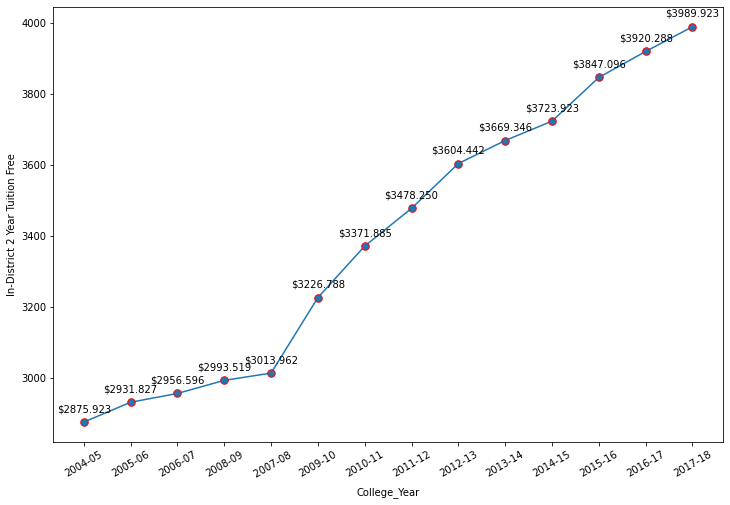

In [30]:
df_group_year = df_new.groupby('College Year').mean().reset_index()
df_group_year = df_group_year.sort_values('In-District 2 Year Tuition Free')
plt.figure(figsize = (12,8))
plt.plot(df_group_year['College Year'], df_group_year['In-District 2 Year Tuition Free'], '.-', markersize = 15, markeredgecolor = 'r')
plt.xlabel('College_Year')
plt.ylabel('In-District 2 Year Tuition Free')
plt.xticks(rotation = 30)

for x,y in zip(df_group_year['College Year'], df_group_year['In-District 2 Year Tuition Free']):
    label = "${:.3f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()

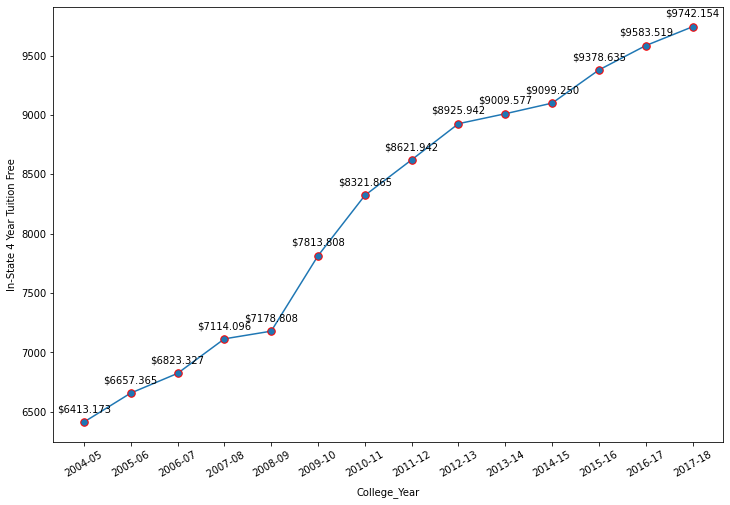

In [31]:
df_group_year = df_group_year.sort_values('In-State 4 Year Tuition Free')
plt.figure(figsize = (12,8))
plt.plot(df_group_year['College Year'], df_group_year['In-State 4 Year Tuition Free'], '.-', markersize = 15, markeredgecolor = 'r')
plt.xlabel('College_Year')
plt.ylabel('In-State 4 Year Tuition Free')
plt.xticks(rotation = 30)

for x,y in zip(df_group_year['College Year'], df_group_year['In-State 4 Year Tuition Free']):
    label = "${:.3f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()

### Đặt yêu cầu ngược lại là cần phải tạo pivot table để xem thống kê theo State và Year 

* Hãy chuyển dữ liệu mới làm ở trên về dạng thống kê 

In [32]:
df_pivot = df_new.pivot(index = 'State', columns = 'College Year', values = ['In-District 2 Year Tuition Free', 'In-State 4 Year Tuition Free'])

In [33]:
df_pivot

In-District 2 Year Tuition Free                          \
College Year                                2007-08  2004-05 2005-06 2006-07   
State                                                                          
Alabama                                       3301.0  3526.0  3420.0  3351.0   
Alaska                                           0.0     0.0     0.0     0.0   
Arizona                                       1981.0  1800.0  1907.0  1997.0   
Arkansas                                      2513.0  2422.0  2480.0  2520.0   
California                                     744.0  1044.0  1015.0   871.0   
Colorado                                      2890.0  2867.0  2992.0  2858.0   
Connecticut                                   3323.0  3110.0  2177.0  3214.0   
Delaware                                      3521.0  3242.0  3357.0  3437.0   
District of Columbia                             0.0     0.0     0.0     0.0   
Florida                                       2387.0  2301.0  2404.0  2443.0   
Georgia                                       2491.0  2682.0  2766.0  2690.0   
Hawaii                                        2287.0  1884.0  1910.0  2083.0   
Idaho                                         2458.0  2324.0  2350.0  2380.0   
Illinois                                      2867.0  2572.0  2690.0  2768.0   
Indiana                                       3529.0  3340.0  3417.0  3467.0   
Iowa                                          3914.0  3774.0  3871.0  3852.0   
Kansas                                        2266.0  2284.0  2315.0  2270.0   
Kentucky                                      4054.0  3580.0  3768.0  3933.0   
Louisiana                                     2250.0  2246.0  2306.0  2255.0   
Maine                                         3667.0  3354.0  3523.0  3520.0   
Maryland                                      3822.0  3849.0  3875.0  3755.0   
Massachusetts                                 4341.0  4344.0  4382.0  4305.0   
Michigan                                      2737.0  2578.0  2663.0  2684.0   
Minnesota                                     5225.0  4905.0  5027.0  5129.0   
Mississippi                                   2008.0  1998.0  2090.0  2036.0   
Missouri                                      2944.0  2781.0  2855.0  2876.0   
Montana                                       3255.0  3058.0  3094.0  3094.0   
Nebraska                                      2532.0  2279.0  2338.0  2421.0   
Nevada                                        2072.0  2055.0  2058.0  2039.0   
New Hampshire                                 6592.0  6049.0  6494.0  6296.0   
New Jersey                                    3980.0  3621.0  3692.0  3835.0   
New Mexico                                    1343.0  1344.0  1401.0  1326.0   
New York                                      4168.0  4229.0  4238.0  4162.0   
North Carolina                                1576.0  1544.0  1560.0  1512.0   
North Dakota                                  4060.0  3877.0  4059.0  3974.0   
Ohio                                          4131.0  4137.0  4236.0  4132.0   
Oklahoma                                      2921.0  2722.0  2802.0  2774.0   
Oregon                                        3786.0  3700.0  3716.0  3802.0   
Pennsylvania                                  3800.0  3707.0  3823.0  3740.0   
Puerto Rico                                      0.0     0.0     0.0     0.0   
Rhode Island                                  3345.0  2986.0  3094.0  3231.0   
South Carolina                                3802.0  3655.0  3684.0  3759.0   
South Dakota                                  4226.0  3923.0  4004.0  4149.0   
Tennessee                                     3093.0  2839.0  2994.0  2995.0   
Texas                                         1938.0  1786.0  1840.0  1937.0   
Utah                                          2872.0  2607.0  2700.0  2795.0   
Vermont                                       6463.0  6100.0  6251.0  6291.0   
Virginia             